dict_keys(['data', 'target', 'feature_names', 'DESCR'])


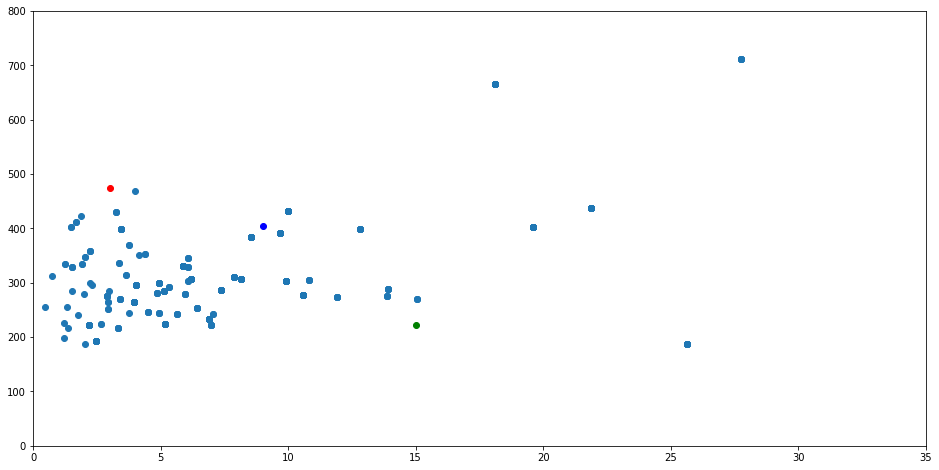

[3, 474]
[15, 223]
[9, 404]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
from scipy import stats

boston=load_boston()
x=boston.data
y=boston.target
print(boston.keys())
df=pd.DataFrame(boston.data)
columns=boston.feature_names
df.columns=columns
cluster_label=[]

np.random.seed(20)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0,20), np.random.randint(0,500)]
    for i in range(k)
}
    
fig=plt.subplots(figsize=(16,8))
plt.scatter(df['INDUS'],df['TAX'])
plt.ylim(0,800)
plt.xlim(0,35)
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

for i in centroids.keys():
    print(centroids[i])

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  distance_from_1  distance_from_2  distance_from_3  \
0     15.3  396.90   4.98       178.001337        74.094778       108.207006   
1     17.8  396.90   9.14       232.035697        20.588465       162.011496   
2     17.8  392.83   4.03       232.035697        20.588465       162.011496   
3     18.7  394.63   2.94       252.001334        12.858942       182.127736   
4     18.7  396.90   5.33       252.001334        12.858942       182.127736   

   closest color  
0        2     g  
1        2     g  
2        2     g  
3   

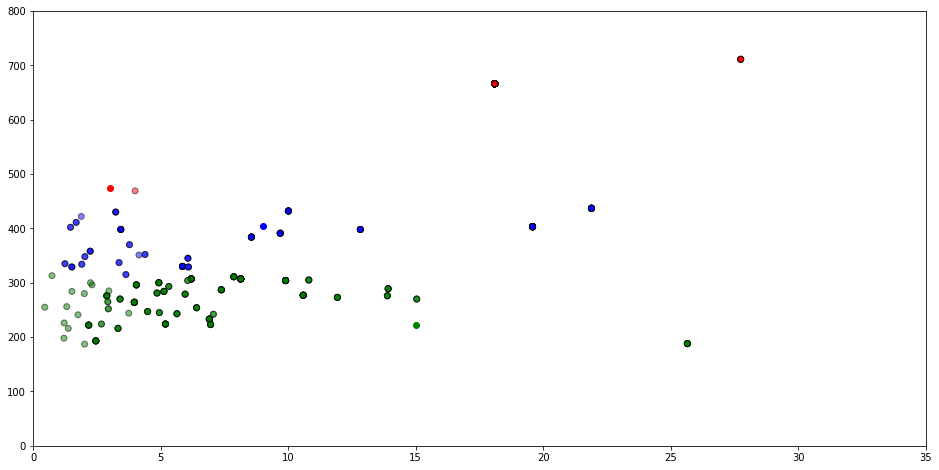

In [2]:
def assignment(df, centroids):
    k=0
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['INDUS'] - centroids[i][0]) ** 2
                + (df['TAX'] - centroids[i][1]) ** 2
            )
        )
      
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    #print(centroid_distance_cols)
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    cluster_label.append(df.loc[:, centroid_distance_cols].idxmin(axis=1))
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])  
    return df


    
def outliers(df,centroid):
    for i in centroid.keys():
        for index,row in df.iterrows():
            z=np.sqrt((row['INDUS']-centroid[i][0])**2+(row['TAX']-centroid[i][1])**2)
            #print(z)
            if(z>400):
                df.drop(index,inplace=True)
                #print(index)
    return df

df = assignment(df, centroids)
print(df.head())
print(df.shape)

fig = plt.figure(figsize=(16, 8))
plt.scatter(df['INDUS'], df['TAX'],color=df['color'], alpha=0.5, edgecolor='k')
plt.ylim(0,800)
plt.xlim(0,35)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()



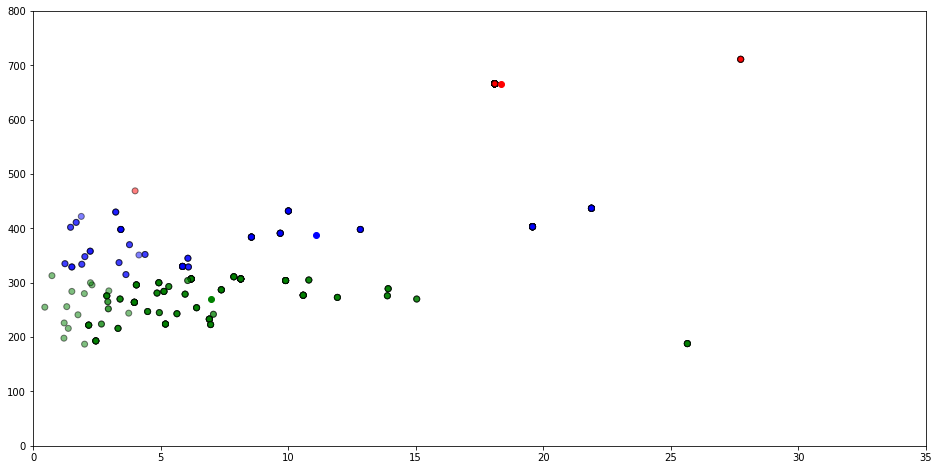

In [3]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['INDUS'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['TAX'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(16, 8))
plt.scatter(df['INDUS'], df['TAX'],color=df['color'], alpha=0.5, edgecolor='k' )
plt.ylim(0,800)
plt.xlim(0,35)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

In [4]:
centroids

{1: [18.347101449275314, 666.2028985507246],
 2: [6.970546218487415, 269.39915966386553],
 3: [11.110153846153848, 388.5769230769231]}

In [5]:
old_centroids

{1: [3, 474], 2: [15, 223], 3: [9, 404]}

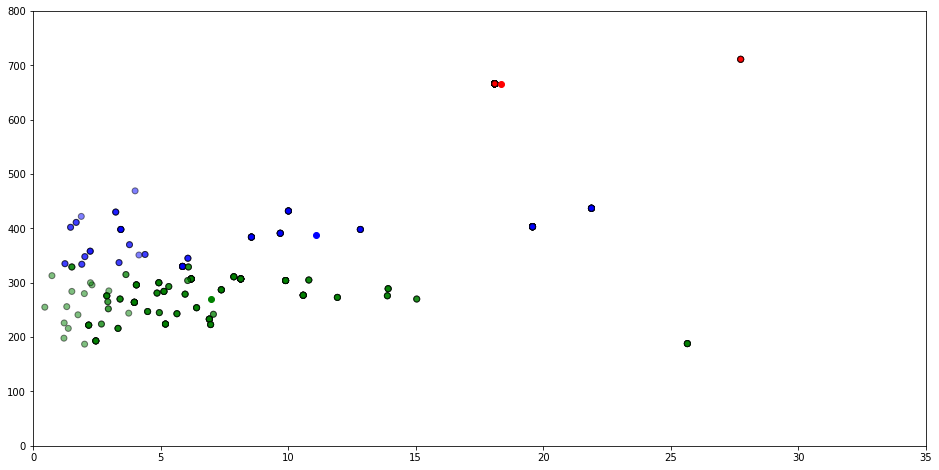

In [6]:
df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(16, 8))
plt.scatter(df['INDUS'], df['TAX'],color=df['color'], alpha=0.5, edgecolor='k')
plt.ylim(0,800)
plt.xlim(0,35)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

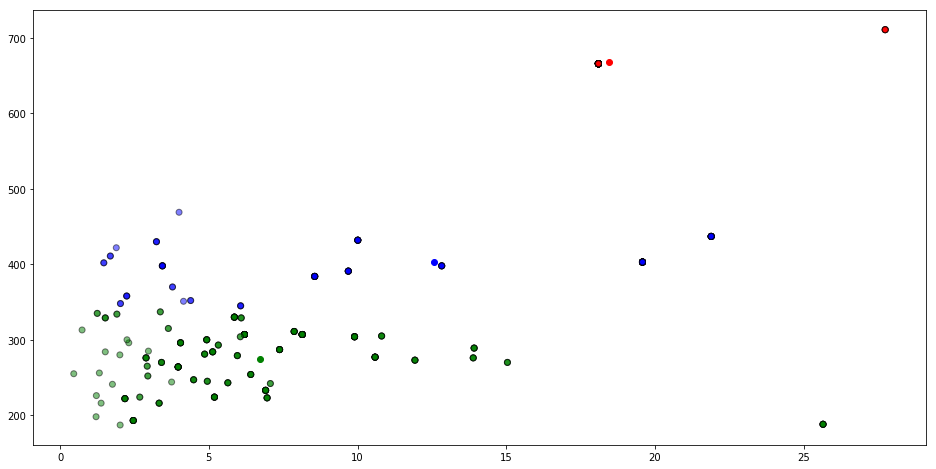

In [7]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']): #that is no change in the centroids
        break
        

        

#OUTLIER REMOVAL
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
#df_o =df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]




fig = plt.figure(figsize=(16, 8))
plt.scatter(df['INDUS'], df['TAX'],color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

       ...             B  LSTAT  distance_from_1  distance_from_2  \
0      ...        396.90   4.98       371.992721        21.521653   
1      ...        396.90   9.14       425.794486        32.936969   
2      ...        392.83   4.03       425.794486        32.936969   
3      ...        394.63   2.94       445.939305        53.129484   
4      ...        396.90   5.33       445.939305        53.129484   

   distance_from_3  closest  color  Probability_1  Probability_2  \
0       106.999123        2      g  6.199393e-153            1.0   
1       16

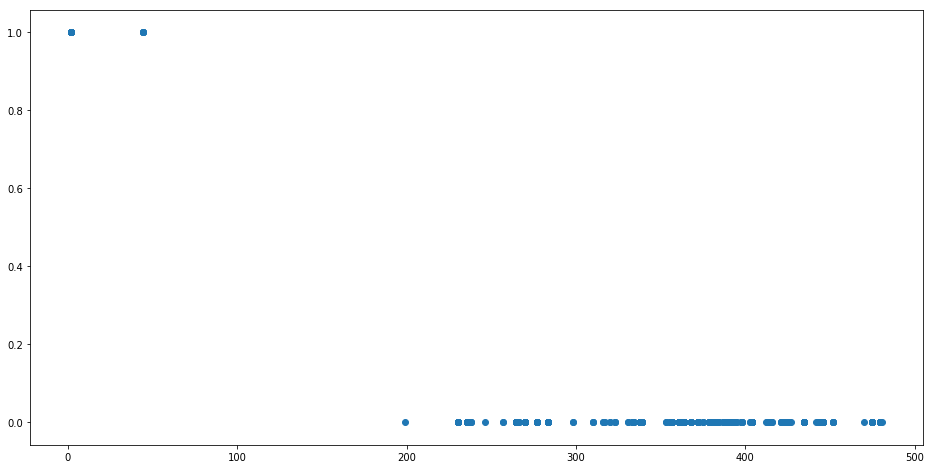

In [8]:
def prob(df,centroids):
    for i in centroids.keys():
            # sqrt((x1 - x2)^2 - (y1 - y2)^2)
            df['Probability_{}'.format(i)] =(np.exp(-1*
                np.sqrt(
                    (df['INDUS'] - centroids[i][0]) ** 2
                    + (df['TAX'] - centroids[i][1]) ** 2
                )
            )/sum(df,centroids)
            )

            centroid_distance_cols1 = ['Probability_'.format(i) for i in centroids.keys()]
            
def sum(df,centroids): 
        sum=0
        for i in centroids.keys():
            
            sum=sum+(np.exp(-1*
                    np.sqrt(
                        (df['INDUS'] - centroids[i][0]) ** 2
                        + (df['TAX'] - centroids[i][1]) ** 2
                    )
                )
                )
        return (sum)


prob(df,centroids)
print(df.head())

fig=plt.figure(figsize=(16,8))
plt.scatter(df['distance_from_1'],df['Probability_1'])

In [9]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,B,LSTAT,distance_from_1,distance_from_2,distance_from_3,closest,color,Probability_1,Probability_2,Probability_3
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,396.90,4.98,371.992721,21.521653,106.999123,2,g,6.199393e-153,1.000000e+00,7.544081e-38
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,396.90,9.14,425.794486,32.936969,160.599379,2,g,2.421857e-171,1.000000e+00,3.605121e-56
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,392.83,4.03,425.794486,32.936969,160.599379,2,g,2.421857e-171,1.000000e+00,3.605121e-56
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,394.63,2.94,445.939305,53.129484,180.804293,2,g,2.540168e-171,1.000000e+00,3.560699e-56
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,396.90,5.33,445.939305,53.129484,180.804293,2,g,2.540168e-171,1.000000e+00,3.560699e-56
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,...,394.12,5.21,445.939305,53.129484,180.804293,2,g,2.540168e-171,1.000000e+00,3.560699e-56
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,...,395.60,12.43,356.799286,36.083201,91.626047,2,g,5.185302e-140,1.000000e+00,7.551770e-25
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,...,396.90,19.15,356.799286,36.083201,91.626047,2,g,5.185302e-140,1.000000e+00,7.551770e-25
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,...,386.63,29.93,356.799286,36.083201,91.626047,2,g,5.185302e-140,1.000000e+00,7.551770e-25
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,...,386.71,17.10,356.799286,36.083201,91.626047,2,g,5.185302e-140,1.000000e+00,7.551770e-25


In [10]:
df.to_csv('kmeans.csv')